# <font color='black'> **Human Activity Recognition (HAR) unidimensionales con redes convolucionales y redes recurrentes**

<font color='black'>**Integrantes:**
    
*   Andres Felipe Guerra Vargas Código: **2211058**
*   Carlos Arbey Mejía Martínez Código: **2210549**

####**Link Repositorio Git de este proyecto:** https://cmejia99@bitbucket.org/cmejia99/har.git

##**Introducción**##

El análisis de señales en el tiempo es estudiado en varias áreas a nivel mundial, por ejemplo en la medicina, la electrónica, entre otras. La actividad humana es ejemplo de ello.

Con este proyecto se tiene como propósito generar un modelo de inteligencia artificial, el cual nos permite clasificar señales secuenciales de un dispositivo móvil (celular) en las siguientes clases, de acuerdo a la actividad realizada:

![img](https://drive.google.com/uc?id=1-m1OKkqOWQng_ytTUTSvp1qXzlFnsRmo)

*   **Escaleras**
*   **Girando**
*   **Sentarse**
*   **Trotar**
*   **Caminar**
*   **Reposo**



## **Marco Teórico** ##

* **DataSet:** Directorio donde se registró todos los archivos Json de las señalas detectadas por medio de un dispositivo celular a través de la herramienta [EDGE IMPULSE](https://studio.edgeimpulse.com/)

* **Edge Impulse:** Es una plataforma de desarrollo para el aprendizaje no automático en dispositivos integrados para sensores, audio y visión por computadora, a escala.

* **Red Convolucional:** Las Redes neuronales convolucionales son  un tipo de redes neuronales artificiales  donde las “neuronas”,  corresponden a campos receptivos de una manera muy similar a las neuronas en la corteza visual primaria (V1) de un cerebro biológico.  Este tipo de red es una variación de un perceptrón multicapa, sin embargo, debido a que su aplicación es realizada en matrices bidimensionales, son muy efectivas para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras aplicaciones.

* **Red Recurrente:** Una red neuronal recurrente no tiene una estructura de capas definida, sino que permiten conexiones arbitrarias entre las neuronas, incluso pudiendo crear ciclos, con esto se consigue crear la temporalidad, permitiendo que la red tenga memoria. Las redes neuronales recurrentes son muy potentes para todo lo que tiene que ver con el análisis de secuencias, como puede ser el análisis de textos, sonido o video.

  Existen tres tipos de tareas esenciales que se pueden realizar con este tipo de redes:

  * **Reconocimiento de secuencias:** Se produce un patrón de salida particular cuando se especifica una secuencia de entrada.

  * **Reproducción de secuencias:** La red debe ser capaz de generar el resto de una secuencia cuando ve parte de ella.

  * **Asociación temporal:** En este caso una secuencia de salida particular se debe producir en respuesta a una secuencia de entrada específica.




## **Descripción del problema a solucionar** ##


Una red neuronal puede ser caracterizada por el modelo de la neurona, el esquema de conexión que presentan sus neuronas, o sea su topologia, y el algoritmo de aprendizaje empleado para adaptar su función de cómputo a las necesidades del problema en particular. En este caso, se analizara las actividades cotidianas de una persona, para generar unas secuencias por medio de un algoritmo de inteligencia artificial.

## **Planteamiento de la solución** ##
Se tiene como propuesta de solución a nuestro proyecto utilizar las siguientes arquitecturas:

*   **Red Convolucional Clásica 1D**
*   **Red Recurrente LSTM**
*   **Red Recurrente GRU**

    Los archivos de muestras se tomaron en intervalos de 10 segundos por un total de 20 minutos por clase. La aplicación [EDGE IMPULSE](https://studio.edgeimpulse.com/) genera archivos con información de 10 segundos por lo que se podrá encontrar 120 archivos Json de los resultados.
    
    ![img](https://drive.google.com/uc?id=1-mI2M15nB4YNuTGmmRWKjZ0k9r6ukk7t)
    
    ![img](https://drive.google.com/uc?id=1-lfmq4X5c9fI0uTE5FOPpTRRkAZkawj2)

    Las clases objetivo del proyecto serán las siguientes:

    *   **Escaleras:** Valores tomados realizando el proceso de subir y bajar escaleras en distintas velocidades.
    *   **Girando:** Valores tomados realizando giros sobre su propio eje hacia ambos sentidos (Izquierda a derecha y Derecha a izquierda).
    *   **Sentarse:** Valores tomados realizando el proceso de sentarse y pararse.
    *   **Trotar:** Valores tomados realizando trote de manera constante.
    *   **Caminar:** Valores tomados realizando caminata constante a un paso lento.
    *   **Reposo:** Valores tomados en estado reposo.

   Se distribuyo el data set generado en dos grupos, uno para entrenamiento y otro para validación, los cuales presentarán 100 archivos para entrenamiento por clase (aproximadamente **374.400**) y 20 archivos para validación por clase (aproximadamente **74.880**). La distribución de los directorios se podrá visualizar a continuación:
   
    ![img](https://drive.google.com/uc?id=1-oThiGikXsgHVidrnvN-fF8UhDjI9xtm) 

## **Resultados** ##

Se especificara paso a paso, el análisis de los resultados.

In [ ]:
#@title **Librerías Utilizadas**:

from google.colab import drive
from math import floor, ceil
import numpy as np
import pandas as pd
import os
from time import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import json
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
#@title **Carga directorio dataset:**

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title **Variables Globales:**

Directory_Gen = "/content/drive/MyDrive/HAR"
Directory=Directory_Gen+"/DataSet/Train"
Dir_Test=Directory_Gen+"/DataSet/Test"
Targets = ['Escaleras','Girando','Sentarse','Trotar','Reposar','Caminar']
ln_window = 100 # Tamaño de venta de 100 datos, es decir 2 segundos.
Total_Class = len(Targets)
Channels = 3

In [ ]:
#@title **Funciones de utilidades creadas para el proyecto:**

# Función para realizar Carga de los datos:
def Load_Data (Directory, targets ):
  IniT = time()
  Iterador = 0
  for dir in targets:
    Direct=Directory+"/"+dir+"/"
    print(Direct)
    #print('Direct ', Direct)
    for File in os.listdir(Direct):
      #print(Direct+File)
      dataframe = pd.read_json(Direct+File)
      values = dataframe.iloc[:,:].values
      Ldata=np.array(values[7,2][0:-1])    
      if Iterador == 0:
        Data = Ldata
      else:
        Data = np.concatenate((Data,Ldata), axis=0)
      Iterador += 1
  FinT =time()
  print('Tiempo de Carga: ',round((FinT - IniT),3))
  return Data, Iterador

# Función para generar las ventanas del dataset:
def Gen_data_window (data, ln_window):
  batch = floor(data.shape[0] / ln_window)
  Train = np.zeros((batch, ln_window, 3))
  for row in range(batch):
    x = row*ln_window
    y = (row+1)*ln_window
    Train[row,:,0]=data[x:y,0].T
    Train[row,:,1]=data[x:y,1].T
    Train[row,:,2]=data[x:y,2].T
  return Train, batch

# Función para validar posiciones de las etiquetas en los bacth:
def Gen_pos_label_batch (targets, batch):
  Block = ceil(batch / len(targets))
  Iterador = -1
  for label in targets:
    location = [Iterador+1, min(Block+Iterador,batch - 1) ]
    print('Etiqueta = '+label+'\n**Ubicacion =',location)
    print()
    if Iterador == -1:
      Location = np.array([location])
    else:
      Location = np.concatenate((Location,[location]), axis=0)
    Iterador += Block
  return Location

# Función de graficacion de muestras:
def plot_samples(row, col, train, location, labels):
  plt.figure(figsize=(22,15))
  Iterador = 1
  for label in Targets:
    Pos = location[Iterador-1][0]    
    plt.subplot(row,col,Iterador)
    plt.title('Muestra '+label+' Etiqueta '+str(labels[Pos]))      
    plt.plot(train[Pos,:,:])  
    Iterador += 1
  plt.show()

# Función de generación de vector de etiquetas:
def Gen_Labels(batch, targets, location):
  Labels = np.zeros((batch,1))
  Iterador = 0
  for label in targets:
    #print(location[Iterador])
    x = location[Iterador][0]
    y = location[Iterador][1]
    for pos in range(x, (y+1) ):
      Labels[pos] = Iterador
    #print(Iterador,pos)
    Iterador += 1
  return Labels

# Función de Almacenado de modelo:
def save_data(ruta, data, model, name):
  model.save(ruta+'/Modelos/'+name+'.h5')
  model.save_weights(ruta+'/Modelos/wght_'+name+'.h5')
  json.dump(data, open(ruta+'/Data/history_'+name+'.js', 'w'))

# Función de carga de modelo:
def load_data(ruta, name):
  history = json.load(open(ruta+'/Data/history_'+name+'.js', 'r'))
  model = keras.models.load_model(ruta+'/Modelos/'+name+'.h5')
  return model,history

## Función modelo 1D
def modelo_1D(Num_class, Num_channels):
  keras.backend.clear_session
  model = keras.models.Sequential([
          keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', 
                              input_shape=(ln_window,3)),
          keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
          keras.layers.Dropout(0.2),
          keras.layers.MaxPool1D(pool_size=2),
          keras.layers.Flatten(),
          keras.layers.Dense(100, activation='relu'),
          keras.layers.Dense(Num_class, activation='softmax')
  ])                   
  return model

## Función modelo 1D v2
def modelo_1D_2(Num_class, Num_channels):
  keras.backend.clear_session
  model = keras.models.Sequential([
          keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', 
                              input_shape=(ln_window,3)),
          keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
          keras.layers.Dropout(0.2),
          keras.layers.Conv1D(filters=512, kernel_size=3, activation='relu'),
          keras.layers.Dropout(0.2),
          keras.layers.MaxPool1D(pool_size=2),
          keras.layers.Flatten(),
          keras.layers.Dense(100, activation='relu'),
          keras.layers.Dropout(0.2),
          keras.layers.Dense(50, activation='relu'),
          keras.layers.Dropout(0.2),
          keras.layers.Dense(Num_class, activation='softmax')
  ])                   
  return model

## Función modelo LSTM
def model_LSTM(Num_class, Num_channels):
  keras.backend.clear_session
  model = keras.models.Sequential([
      keras.layers.Input(shape=[None,Num_channels]),
      keras.layers.LSTM(10,return_sequences=True, name='LSTM_1'),
      keras.layers.LSTM(10,return_sequences=True, name='LSTM_2'),
      keras.layers.LSTM(5, name='LSTM_3'),
      keras.layers.Dense(20,activation='relu', name='FC_1'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(10,activation='relu', name='FC_2'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(Num_class, activation='softmax')
  ])
  return model

## Función modelo LSTM_2
def model_LSTM_2(Num_class, Num_channels):
  keras.backend.clear_session
  model = keras.models.Sequential([
      keras.layers.Input(shape=[None,Num_channels]),
      keras.layers.LSTM(10,return_sequences=True, name='LSTM_1'),
      keras.layers.LSTM(10,return_sequences=True, name='LSTM_2'),
      keras.layers.LSTM(5, name='LSTM_3'),
      keras.layers.Dense(20,activation='relu', name='FC_1'),
      keras.layers.Dense(10,activation='relu', name='FC_2'),
      keras.layers.Dense(Num_class, activation='softmax')
  ])
  return model

## Función modelo GRU
def model_GRU(Num_class, Num_channels):
  keras.backend.clear_session
  model = keras.models.Sequential([
      keras.layers.Input(shape=[None,Num_channels]),
      keras.layers.GRU(10,return_sequences=True, name='GRU_1'),
      keras.layers.GRU(10,return_sequences=True, name='GRU_2'),
      keras.layers.GRU(5, name='GRU_3'),
      keras.layers.Dense(20,activation='relu', name='FC_1'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(10,activation='relu', name='FC_2'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(Num_class, activation='softmax')
  ])
  return model

## Función modelo GRU_2
def model_GRU_2(Num_class, Num_channels):
  keras.backend.clear_session
  model = keras.models.Sequential([
      keras.layers.Input(shape=[None,Num_channels]),
      keras.layers.GRU(10,return_sequences=True, name='GRU_1'),
      keras.layers.GRU(10,return_sequences=True, name='GRU_2'),
      keras.layers.GRU(5, name='GRU_3'),
      keras.layers.Dense(20,activation='relu', name='FC_1'),
      keras.layers.Dense(10,activation='relu', name='FC_2'),
      keras.layers.Dense(Num_class, activation='softmax')
  ])
  return model

## Función para realizar el entrenamiento:
def begin_train (k_model, name, nm_epochs, nm_bacth):
  history = k_model.fit(Train,Labels, epochs=nm_epochs, batch_size=nm_bacth,
                           validation_data=(Test, Labels_Val), verbose=1)
  
  ### Se guarda la información del modelo generado
  History = history.history
  save_data(Directory_Gen, History, k_model, name)
  print('Se Salvo el modelo en '+Directory_Gen+' nombre: '+name)
  return history, k_model

## Función de graficación de resultados loss - accuracy modelos
def plot_results (His_data):

  ### Gráfica de Accuracy
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  plt.title('Modelo Accuracy')
  plt.plot(His_data['accuracy'])
  plt.plot(His_data['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['train','validation'], loc='upper left')

  ### Gráfica loss
  plt.subplot(1,2,2)
  plt.title('Modelo Loss')
  plt.plot(His_data['loss'])
  plt.plot(His_data['val_loss'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['train','validation'], loc='upper left')
  plt.show()

# Función para pintar la matriz de confusión
def plot_confusion_matrix (model, test, target, labels, plt_cm=1):
  Labels_predic=model.predict(test)
  Label_ori = np.argmax(target,axis=1) 
  Label_eva = np.argmax(Labels_predic,axis=1) 

  # Accuracy of the predicted values
  if plt_cm==1:
    print(classification_report(Label_ori, Label_eva, target_names=labels)) # Precisión , Recall, F1-Score & Support
  cm = confusion_matrix(Label_ori, Label_eva)
  # visualize the confusion matri in a heat map
  df_cm = pd.DataFrame(cm)
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)

In [ ]:
#@title **Se cargan los datos del dataset de entrenamiento:**

Data, num_file = Load_Data (Directory,Targets)
print('Dimensiones Data ', Data.shape, num_file)

/content/drive/MyDrive/HAR/DataSet/Train/Escaleras/
/content/drive/MyDrive/HAR/DataSet/Train/Girando/
/content/drive/MyDrive/HAR/DataSet/Train/Sentarse/
/content/drive/MyDrive/HAR/DataSet/Train/Trotar/
/content/drive/MyDrive/HAR/DataSet/Train/Reposar/
/content/drive/MyDrive/HAR/DataSet/Train/Caminar/
Tiempo de Carga:  431.879
Dimensiones Data  (374398, 3) 600


In [ ]:
#@title **Se cargan los datos del dataset de validación:**

Data_Val, num_file_Val = Load_Data (Dir_Test,Targets)
print('Dimensiones Data ', Data_Val.shape, num_file_Val)

/content/drive/MyDrive/HAR/DataSet/Test/Escaleras/
/content/drive/MyDrive/HAR/DataSet/Test/Girando/
/content/drive/MyDrive/HAR/DataSet/Test/Sentarse/
/content/drive/MyDrive/HAR/DataSet/Test/Trotar/
/content/drive/MyDrive/HAR/DataSet/Test/Reposar/
/content/drive/MyDrive/HAR/DataSet/Test/Caminar/
Tiempo de Carga:  84.837
Dimensiones Data  (74880, 3) 120


In [ ]:
#@title **Se realiza un preprocesamiento de los datos:**

Model_Stsc = StandardScaler()
Model_Stsc.fit(Data)
Data_Stsc=Model_Stsc.transform(Data)

Model_MmSc = MinMaxScaler()
Model_MmSc.fit(Data)
Data_Mmsc=Model_MmSc.transform(Data)

Model_Norm = Normalizer()
Model_Norm.fit(Data)
Data_Norm=Model_Norm.transform(Data)

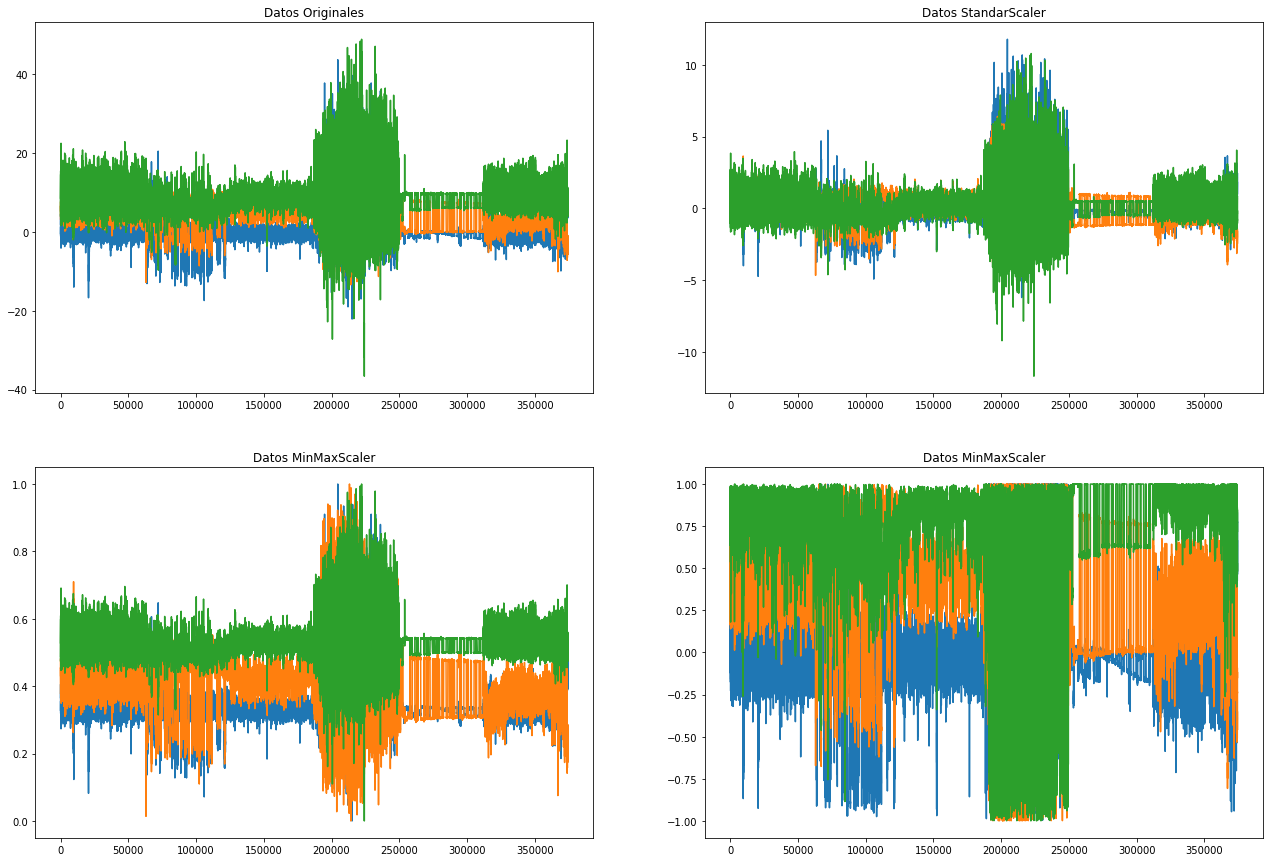

In [ ]:
#@title **Se gráfica de la información original y preprocesada:**

plt.figure(figsize=(22,15))
plt.subplot(2,2,1)
plt.title('Datos Originales')
plt.plot(Data)
plt.subplot(2,2,2)
plt.title('Datos StandarScaler')
plt.plot(Data_Stsc)
plt.subplot(2,2,3)
plt.title('Datos MinMaxScaler')
plt.plot(Data_Mmsc)
plt.subplot(2,2,4)
plt.title('Datos MinMaxScaler')
plt.plot(Data_Norm)
plt.show()

In [ ]:
#@title **Se asigna la mejor distribucción de dataset despues del preprocesamiento para entrenamiento:**

data_final =  Data 
Train, Batch = Gen_data_window (data_final, ln_window)
print("Cantidad Archivos = "+str(num_file)+'\nTamaño Ventana = '+str(ln_window)+
      '\nTamaño Batch = '+str(Batch)+'\nDataSet Train = ', Train.shape)

Cantidad Archivos = 600
Tamaño Ventana = 100
Tamaño Batch = 3743
DataSet Train =  (3743, 100, 3)


In [ ]:
#@title **Se asigna la mejor distribucción de dataset despues del preprocesamiento para Validación:**

data_final_Val =  Data_Val
Test, Batch_Val = Gen_data_window (data_final_Val, ln_window)
print("Cantidad Archivos = "+str(num_file_Val)+'\nTamaño Ventana = '+str(ln_window)+
      '\nTamaño Batch = '+str(Batch_Val)+'\nDataSet Train = ', Test.shape)

Cantidad Archivos = 120
Tamaño Ventana = 100
Tamaño Batch = 748
DataSet Train =  (748, 100, 3)


Etiqueta = Escaleras
**Ubicacion = [0, 623]

Etiqueta = Girando
**Ubicacion = [624, 1247]

Etiqueta = Sentarse
**Ubicacion = [1248, 1871]

Etiqueta = Trotar
**Ubicacion = [1872, 2495]

Etiqueta = Reposar
**Ubicacion = [2496, 3119]

Etiqueta = Caminar
**Ubicacion = [3120, 3742]



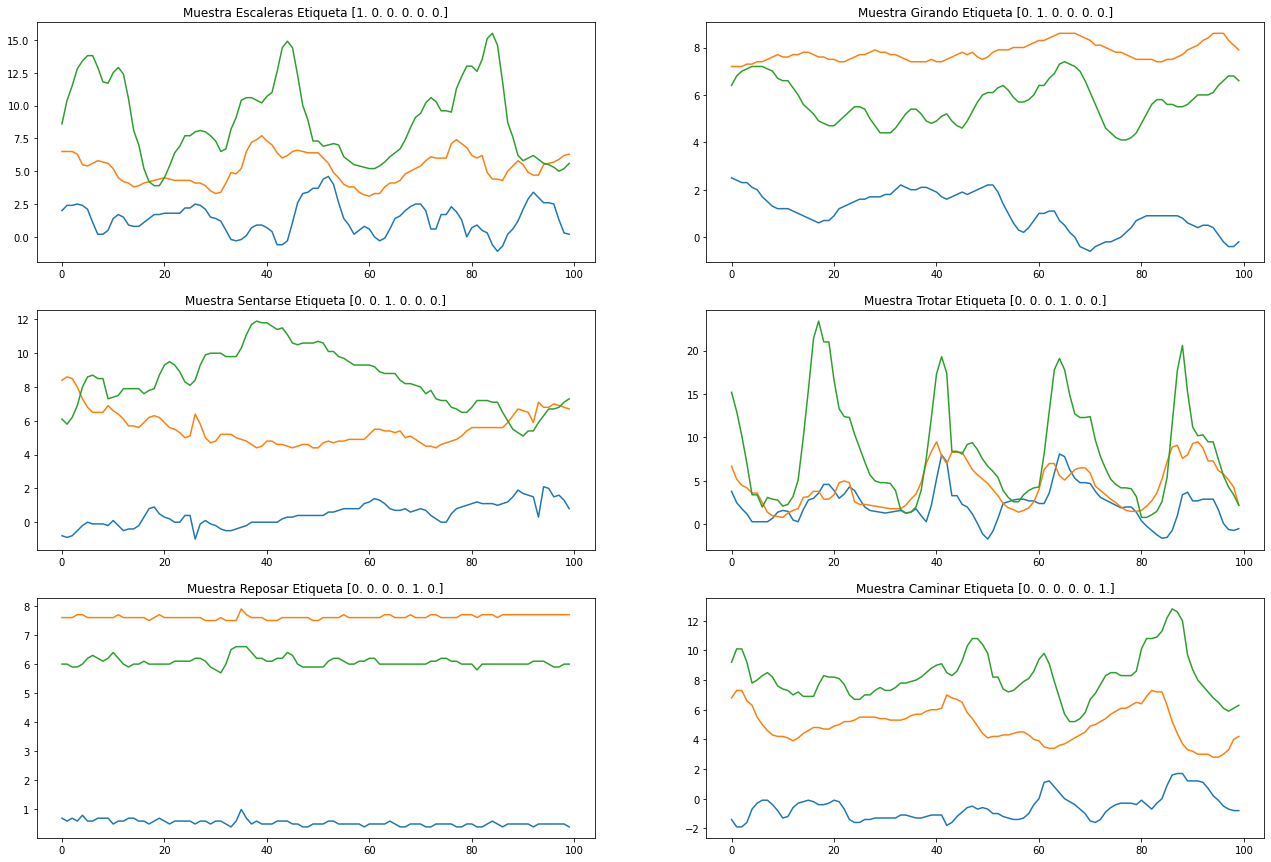


Dimensiones 

Train =  (3743, 100, 3) 
Label =  (3743, 6)


In [ ]:
#@title **Se genera la informacion de etiquetado de entrenamiento:**

## Se genera la posicion de los datos de muestra:
Location = Gen_pos_label_batch (Targets, Batch)

## Se genera el vector de etiquetas:
Labels = Gen_Labels(Batch, Targets, Location)

## Se transforma las etiquetas a categoricas:
Labels = to_categorical(Labels)

## Se grafica muestras de ejemplo:
plot_samples(3, 2, Train, Location, Labels)

print()
print("Dimensiones \n\nTrain = ", Train.shape,'\nLabel = ',Labels.shape)

Etiqueta = Escaleras
**Ubicacion = [0, 124]

Etiqueta = Girando
**Ubicacion = [125, 249]

Etiqueta = Sentarse
**Ubicacion = [250, 374]

Etiqueta = Trotar
**Ubicacion = [375, 499]

Etiqueta = Reposar
**Ubicacion = [500, 624]

Etiqueta = Caminar
**Ubicacion = [625, 747]



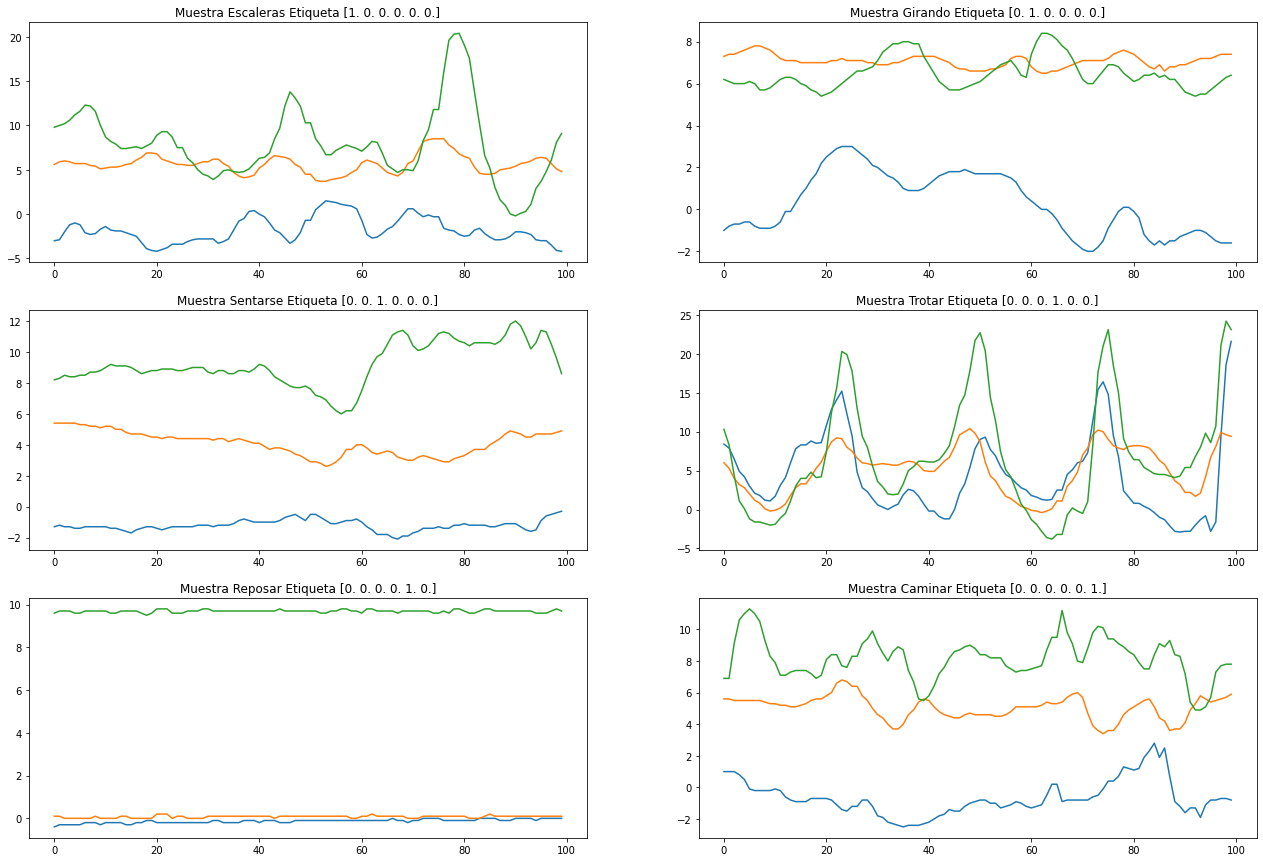


Dimensiones 

Test =  (748, 100, 3) 
Labels_Val =  (748, 6)


In [ ]:
#@title **Se genera la informacion de etiquetado de Validación:**

##Se genera la posicion de los datos de muestra:
Location_Val = Gen_pos_label_batch (Targets, Batch_Val)

##Se genera el vector de etiquetas:
Labels_Val = Gen_Labels(Batch_Val, Targets, Location_Val)

##Se transforma las etiquetas a categoricas:
Labels_Val = to_categorical(Labels_Val)

##Se grafica muestras de ejemplo:
plot_samples(3, 2, Test, Location_Val, Labels_Val)

print()
print("Dimensiones \n\nTest = ", Test.shape,'\nLabels_Val = ',Labels_Val.shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 64)            640       
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            12352     
                                                                 
 dropout (Dropout)           (None, 96, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 48, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                        

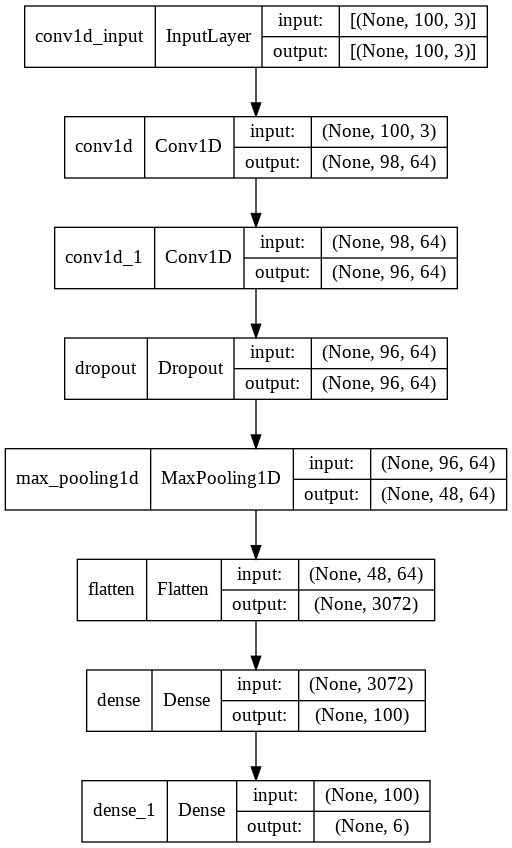

In [ ]:
#@title <font color='blue'> **Se crea el modelo 1D:**</font> Con loss: **categorical_crossentropy**, Optimizador: **adam** y Métricas: **Accuracy** 

#modelo1D = modelo_1D(Total_Class, Channels)
modelo1D = modelo_1D(Total_Class, Channels)
modelo1D.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])
modelo1D.summary()
keras.utils.plot_model(modelo1D, to_file=Directory_Gen+'/model_1D.png', show_shapes=True, show_layer_names=True)


Epoch 1/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0412 - accuracy: 0.9925 - val_loss: 8.1466 - val_accuracy: 0.7594
Epoch 2/50
375/375 [==============================] - 2s 7ms/step - loss: 0.0497 - accuracy: 0.9882 - val_loss: 10.3151 - val_accuracy: 0.7246
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0075 - accuracy: 0.9971 - val_loss: 10.7822 - val_accuracy: 0.6832
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 10.6503 - val_accuracy: 0.7473
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 9.9899 - val_accuracy: 0.7594
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 3.9682e-04 - accuracy: 1.0000 - val_loss: 10.1940 - val_accuracy: 0.7567
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 2.9087e-04 - accuracy: 1.0000 - val_loss: 11.4727 - val_accuracy: 

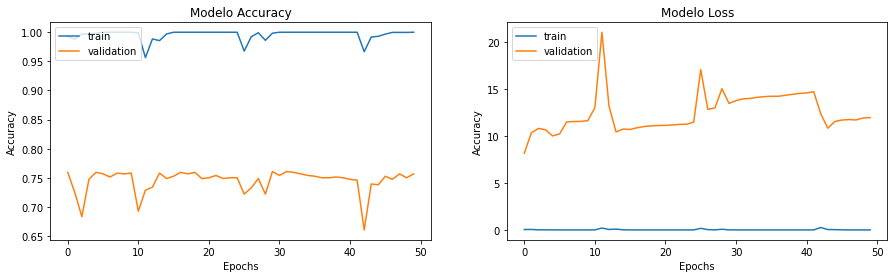


              precision    recall  f1-score   support

   Escaleras       0.54      0.29      0.37       125
     Girando       0.59      0.71      0.65       125
    Sentarse       0.79      0.86      0.82       125
      Trotar       0.93      0.92      0.93       125
     Reposar       0.98      0.99      0.99       125
     Caminar       0.65      0.77      0.71       123

    accuracy                           0.76       748
   macro avg       0.75      0.76      0.74       748
weighted avg       0.75      0.76      0.74       748



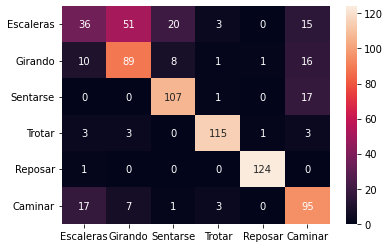

In [ ]:
#@title <font color='blue'>**Se ejecuta el entrenamiento del modelo 1D:**</font> Se utilizaron 50 epocas con tamaño de batch 10

##Se realiza el entrenamiento del modelo:
hist_1d, modelo1D = begin_train (modelo1D, 'Model_1D', 50, 10)
print()
plot_results (hist_1d.history)
print()
plot_confusion_matrix (modelo1D, Test, Labels_Val, Targets)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 98, 64)            640       
                                                                 
 conv1d_3 (Conv1D)           (None, 96, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 96, 128)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 94, 512)           197120    
                                                                 
 dropout_2 (Dropout)         (None, 94, 512)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 47, 512)          0         
 1D)                                                             
                                                      

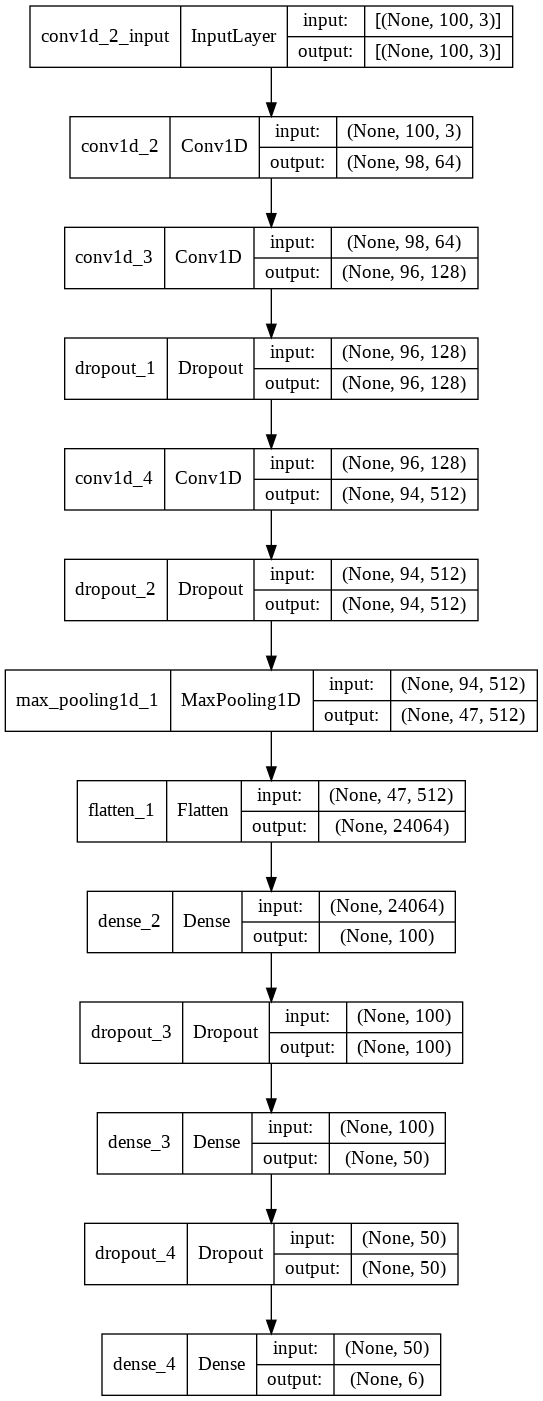

In [ ]:
#@title <font color='blue'> **Se crea el modelo 1D V2:**</font> Con loss: **categorical_crossentropy**, Optimizador: **adam** y Métricas: **Accuracy**

#modelo1D = modelo_1D(Total_Class, Channels)
modelo1D2 = modelo_1D_2(Total_Class, Channels)
modelo1D2.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])
modelo1D2.summary()
keras.utils.plot_model(modelo1D2, to_file=Directory_Gen+'/model_1D_2.png', show_shapes=True, show_layer_names=True)

Epoch 1/200
375/375 [==============================] - 6s 12ms/step - loss: 1.0344 - accuracy: 0.6431 - val_loss: 2.1468 - val_accuracy: 0.5094
Epoch 2/200
375/375 [==============================] - 4s 10ms/step - loss: 0.5792 - accuracy: 0.8191 - val_loss: 1.8885 - val_accuracy: 0.6016
Epoch 3/200
375/375 [==============================] - 4s 10ms/step - loss: 0.4055 - accuracy: 0.8691 - val_loss: 1.5537 - val_accuracy: 0.6283
Epoch 4/200
375/375 [==============================] - 4s 10ms/step - loss: 0.4065 - accuracy: 0.8747 - val_loss: 2.0053 - val_accuracy: 0.6618
Epoch 5/200
375/375 [==============================] - 4s 10ms/step - loss: 0.3038 - accuracy: 0.9036 - val_loss: 2.1473 - val_accuracy: 0.6484
Epoch 6/200
375/375 [==============================] - 4s 10ms/step - loss: 0.3121 - accuracy: 0.9089 - val_loss: 1.8732 - val_accuracy: 0.6524
Epoch 7/200
375/375 [==============================] - 4s 10ms/step - loss: 0.2625 - accuracy: 0.9150 - val_loss: 1.6732 - val_accuracy:

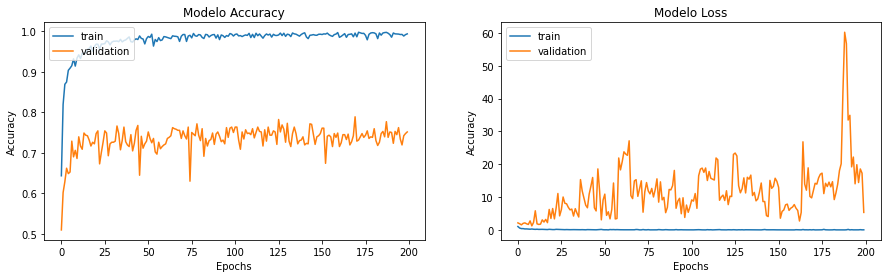


              precision    recall  f1-score   support

   Escaleras       0.54      0.36      0.43       125
     Girando       0.56      0.63      0.59       125
    Sentarse       0.76      0.89      0.82       125
      Trotar       0.94      0.88      0.91       125
     Reposar       0.97      0.99      0.98       125
     Caminar       0.70      0.76      0.73       123

    accuracy                           0.75       748
   macro avg       0.74      0.75      0.74       748
weighted avg       0.75      0.75      0.74       748



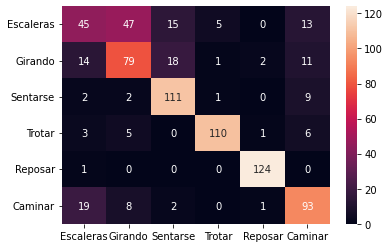

In [ ]:
#@title <font color='blue'>**Se ejecuta el entrenamiento del modelo 1D V2:**</font> Se utilizaron 200 epocas con tamaño de batch 10

##Se realiza el entrenamiento del modelo:
hist_1d2, modelo1D2 = begin_train (modelo1D2, 'Model_1D_2', 200, 10)
print()
plot_results (hist_1d2.history)
print()
plot_confusion_matrix (modelo1D2, Test, Labels_Val, Targets)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_1 (LSTM)               (None, None, 10)          560       
                                                                 
 LSTM_2 (LSTM)               (None, None, 10)          840       
                                                                 
 LSTM_3 (LSTM)               (None, 5)                 320       
                                                                 
 FC_1 (Dense)                (None, 20)                120       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 FC_2 (Dense)                (None, 10)                210       
                                                                 
 dropout_6 (Dropout)         (None, 10)               

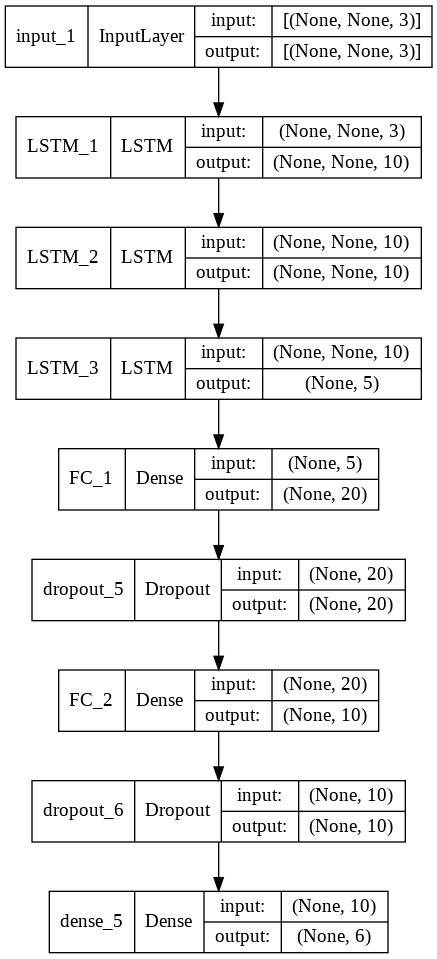

In [ ]:
#@title <font color='blue'> **Se crea el modelo LSTM:**</font> Con loss: **categorical_crossentropy**, Optimizador: **adam** y Métricas: **Accuracy** 

model_lstm = model_LSTM(Total_Class, Channels)
model_lstm.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])
model_lstm.summary()
keras.utils.plot_model(model_lstm, to_file=Directory_Gen+'/model_LSTM.png', show_shapes=True, show_layer_names=True)

Epoch 1/50
375/375 [==============================] - 33s 69ms/step - loss: 1.5418 - accuracy: 0.3454 - val_loss: 1.8285 - val_accuracy: 0.3115
Epoch 2/50
375/375 [==============================] - 24s 65ms/step - loss: 1.1388 - accuracy: 0.5624 - val_loss: 2.0371 - val_accuracy: 0.3195
Epoch 3/50
375/375 [==============================] - 24s 65ms/step - loss: 0.9950 - accuracy: 0.6169 - val_loss: 2.1608 - val_accuracy: 0.3623
Epoch 4/50
375/375 [==============================] - 24s 65ms/step - loss: 0.9684 - accuracy: 0.6540 - val_loss: 1.9599 - val_accuracy: 0.3075
Epoch 5/50
375/375 [==============================] - 24s 65ms/step - loss: 0.9198 - accuracy: 0.6823 - val_loss: 1.9654 - val_accuracy: 0.3810
Epoch 6/50
375/375 [==============================] - 24s 65ms/step - loss: 0.8901 - accuracy: 0.6893 - val_loss: 1.7885 - val_accuracy: 0.4786
Epoch 7/50
375/375 [==============================] - 24s 65ms/step - loss: 0.7866 - accuracy: 0.7481 - val_loss: 1.8586 - val_accuracy:

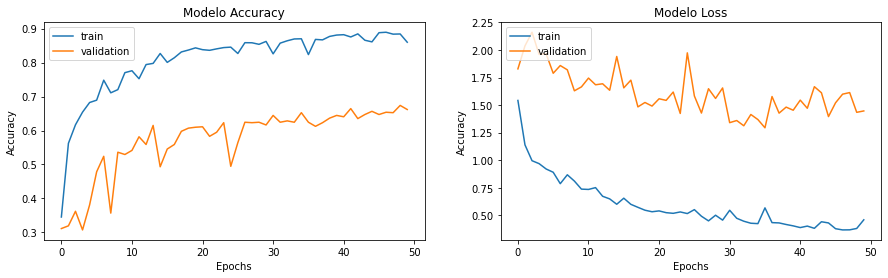


              precision    recall  f1-score   support

   Escaleras       0.26      0.23      0.25       125
     Girando       0.39      0.34      0.36       125
    Sentarse       0.76      0.92      0.83       125
      Trotar       0.80      0.88      0.84       125
     Reposar       0.93      0.99      0.96       125
     Caminar       0.70      0.61      0.65       123

    accuracy                           0.66       748
   macro avg       0.64      0.66      0.65       748
weighted avg       0.64      0.66      0.65       748



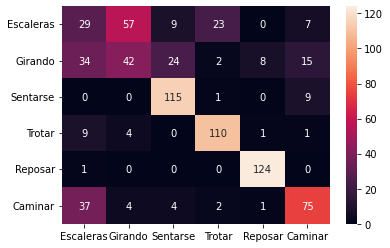

In [ ]:
#@title <font color='blue'>**Se ejecuta el entrenamiento del modelo LSTM:**</font> Se utilizaron 50 epocas con tamaño de batch 10

##Se realiza el entrenamiento del modelo:
hist_lstm, model_lstm = begin_train (model_lstm, 'Model_LSTM', 50, 10)
print()
plot_results (hist_lstm.history)
print()
plot_confusion_matrix (model_lstm, Test, Labels_Val, Targets)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_1 (LSTM)               (None, None, 10)          560       
                                                                 
 LSTM_2 (LSTM)               (None, None, 10)          840       
                                                                 
 LSTM_3 (LSTM)               (None, 5)                 320       
                                                                 
 FC_1 (Dense)                (None, 20)                120       
                                                                 
 FC_2 (Dense)                (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 6)                 66        
                                                                 
Total params: 2,116
Trainable params: 2,116
Non-traina

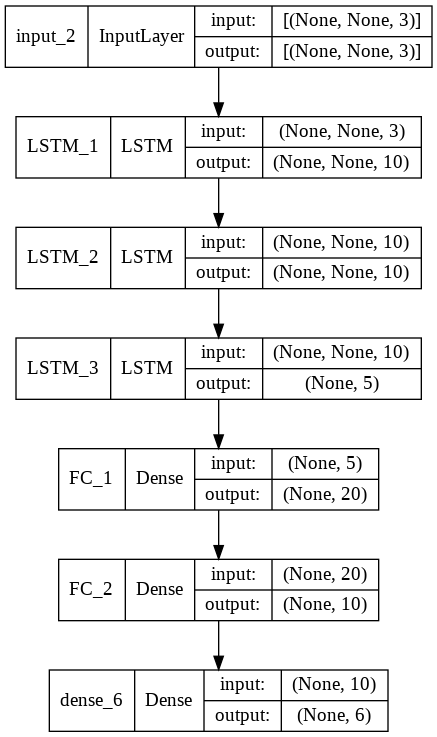

In [ ]:
#@title <font color='blue'> **Se crea el modelo LSTM_2:**</font> Con loss: **categorical_crossentropy**, Optimizador: **adam** y Métricas: **Accuracy**, sin dropout.

model_lstm2 = model_LSTM_2(Total_Class, Channels)
model_lstm2.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])
model_lstm2.summary()
keras.utils.plot_model(model_lstm2, to_file=Directory_Gen+'/model_LSTM_2.png', show_shapes=True, show_layer_names=True)

Epoch 1/50
375/375 [==============================] - 32s 69ms/step - loss: 1.3930 - accuracy: 0.3954 - val_loss: 1.8705 - val_accuracy: 0.4091
Epoch 2/50
375/375 [==============================] - 24s 65ms/step - loss: 1.0292 - accuracy: 0.5757 - val_loss: 1.6165 - val_accuracy: 0.4840
Epoch 3/50
375/375 [==============================] - 24s 65ms/step - loss: 0.7976 - accuracy: 0.7123 - val_loss: 1.5247 - val_accuracy: 0.4973
Epoch 4/50
375/375 [==============================] - 24s 65ms/step - loss: 0.6706 - accuracy: 0.7606 - val_loss: 1.5836 - val_accuracy: 0.4586
Epoch 5/50
375/375 [==============================] - 24s 65ms/step - loss: 0.6124 - accuracy: 0.7935 - val_loss: 1.5344 - val_accuracy: 0.5147
Epoch 6/50
375/375 [==============================] - 24s 65ms/step - loss: 0.6008 - accuracy: 0.7991 - val_loss: 1.5583 - val_accuracy: 0.4679
Epoch 7/50
375/375 [==============================] - 24s 65ms/step - loss: 0.5167 - accuracy: 0.8354 - val_loss: 1.4977 - val_accuracy:

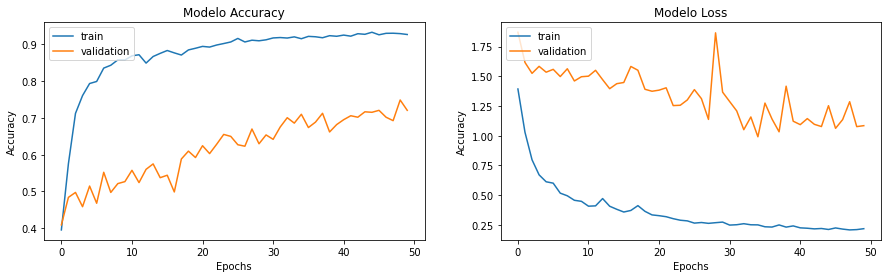


              precision    recall  f1-score   support

   Escaleras       0.56      0.57      0.57       125
     Girando       0.51      0.42      0.46       125
    Sentarse       0.88      0.72      0.79       125
      Trotar       0.95      0.82      0.88       125
     Reposar       0.98      0.99      0.98       125
     Caminar       0.54      0.81      0.65       123

    accuracy                           0.72       748
   macro avg       0.74      0.72      0.72       748
weighted avg       0.74      0.72      0.72       748



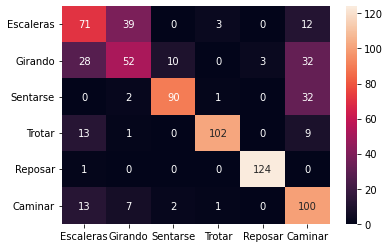

In [ ]:
#@title <font color='blue'>**Se ejecuta el entrenamiento del modelo LSTM_2:**</font> Se utilizaron 50 epocas con tamaño de batch 10

##Se realiza el entrenamiento del modelo:
hist_lstm2, model_lstm2 = begin_train (model_lstm2, 'Model_LSTM_2', 50, 10)
print()
plot_results (hist_lstm2.history)
print()
plot_confusion_matrix (model_lstm2, Test, Labels_Val, Targets)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 GRU_1 (GRU)                 (None, None, 10)          450       
                                                                 
 GRU_2 (GRU)                 (None, None, 10)          660       
                                                                 
 GRU_3 (GRU)                 (None, 5)                 255       
                                                                 
 FC_1 (Dense)                (None, 20)                120       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 FC_2 (Dense)                (None, 10)                210       
                                                                 
 dropout_8 (Dropout)         (None, 10)               

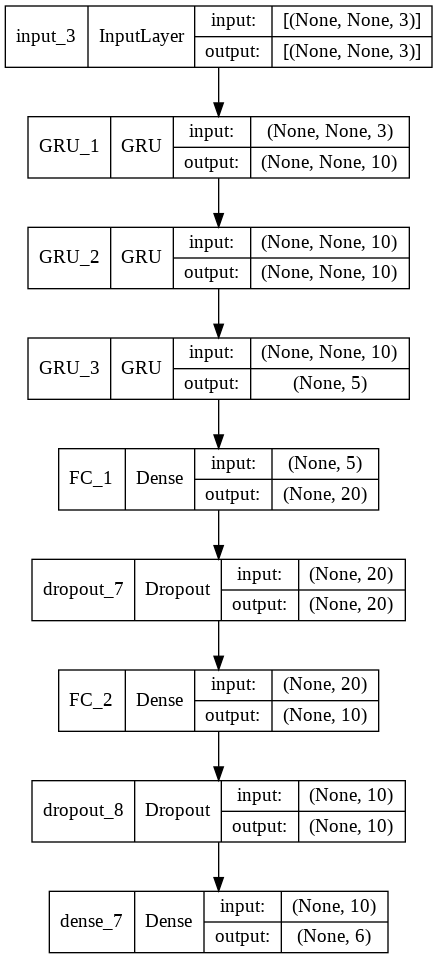

In [ ]:
#@title <font color='blue'> **Se crea el modelo GRU:**</font> Con loss: **categorical_crossentropy**, Optimizador: **adam** y Métricas: **Accuracy**

model_gru = model_GRU(Total_Class, Channels)
model_gru.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])
model_gru.summary()
keras.utils.plot_model(model_gru, to_file=Directory_Gen+'/model_GRU.png', show_shapes=True, show_layer_names=True)

Epoch 1/50
375/375 [==============================] - 31s 68ms/step - loss: 1.4816 - accuracy: 0.4253 - val_loss: 1.4571 - val_accuracy: 0.5134
Epoch 2/50
375/375 [==============================] - 25s 66ms/step - loss: 0.9910 - accuracy: 0.6407 - val_loss: 1.3052 - val_accuracy: 0.5789
Epoch 3/50
375/375 [==============================] - 24s 64ms/step - loss: 0.8182 - accuracy: 0.7045 - val_loss: 1.2726 - val_accuracy: 0.6163
Epoch 4/50
375/375 [==============================] - 24s 64ms/step - loss: 0.7228 - accuracy: 0.7433 - val_loss: 1.2901 - val_accuracy: 0.6070
Epoch 5/50
375/375 [==============================] - 24s 64ms/step - loss: 0.6507 - accuracy: 0.7665 - val_loss: 1.3315 - val_accuracy: 0.6096
Epoch 6/50
375/375 [==============================] - 24s 64ms/step - loss: 0.6032 - accuracy: 0.7809 - val_loss: 1.2610 - val_accuracy: 0.6297
Epoch 7/50
375/375 [==============================] - 24s 64ms/step - loss: 0.5804 - accuracy: 0.7932 - val_loss: 1.2848 - val_accuracy:

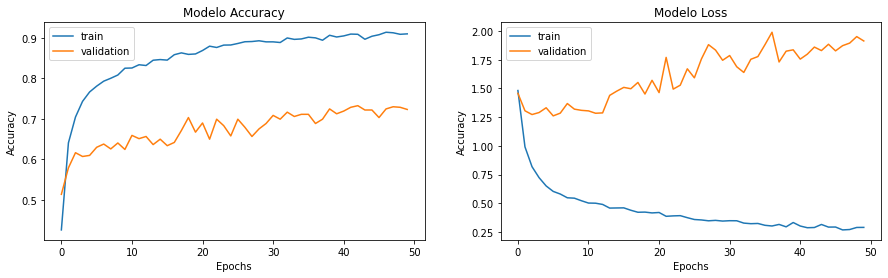


              precision    recall  f1-score   support

   Escaleras       0.44      0.34      0.38       125
     Girando       0.43      0.40      0.42       125
    Sentarse       0.88      0.91      0.89       125
      Trotar       0.90      0.91      0.90       125
     Reposar       0.95      0.99      0.97       125
     Caminar       0.65      0.79      0.71       123

    accuracy                           0.72       748
   macro avg       0.71      0.72      0.71       748
weighted avg       0.71      0.72      0.71       748



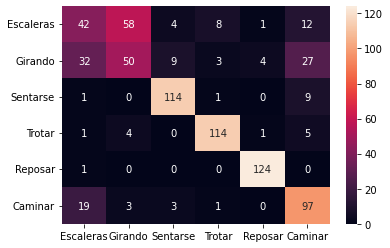

In [ ]:
#@title <font color='blue'>**Se ejecuta el entrenamiento del modelo GRU:**</font> Se utilizaron 50 epocas con tamaño de batch 10

##Se realiza el entrenamiento del modelo:
hist_gru, model_gru = begin_train (model_gru, 'Model_GRU', 50, 10)
print()
plot_results (hist_gru.history)
print()
plot_confusion_matrix (model_gru, Test, Labels_Val, Targets)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 GRU_1 (GRU)                 (None, None, 10)          450       
                                                                 
 GRU_2 (GRU)                 (None, None, 10)          660       
                                                                 
 GRU_3 (GRU)                 (None, 5)                 255       
                                                                 
 FC_1 (Dense)                (None, 20)                120       
                                                                 
 FC_2 (Dense)                (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-traina

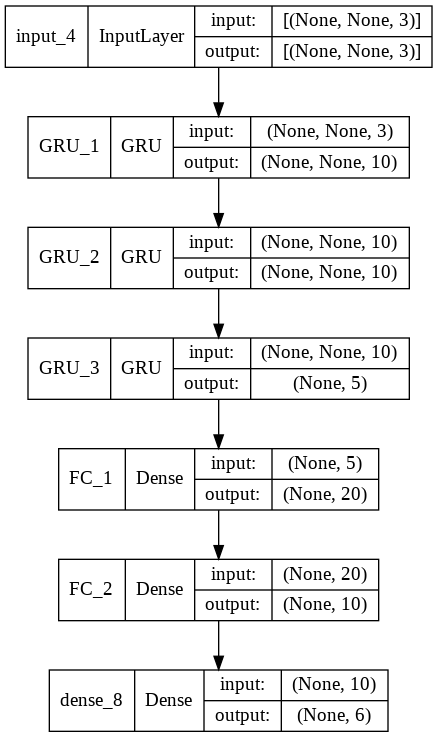

In [ ]:
#@title <font color='blue'> **Se crea el modelo GRU_2:**</font> Con loss: **categorical_crossentropy**, Optimizador: **adam** y Métricas: **Accuracy**, sin dropout.

model_gru2 = model_GRU_2(Total_Class, Channels)
model_gru2.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])
model_gru2.summary()
keras.utils.plot_model(model_gru2, to_file=Directory_Gen+'/model_GRU_2.png', show_shapes=True, show_layer_names=True)

Epoch 1/50
375/375 [==============================] - 30s 67ms/step - loss: 1.3656 - accuracy: 0.3957 - val_loss: 1.8062 - val_accuracy: 0.3209
Epoch 2/50
375/375 [==============================] - 24s 64ms/step - loss: 1.0075 - accuracy: 0.5469 - val_loss: 1.8118 - val_accuracy: 0.3663
Epoch 3/50
375/375 [==============================] - 24s 63ms/step - loss: 0.8254 - accuracy: 0.7189 - val_loss: 1.6424 - val_accuracy: 0.5160
Epoch 4/50
375/375 [==============================] - 24s 63ms/step - loss: 0.6695 - accuracy: 0.7620 - val_loss: 1.5880 - val_accuracy: 0.4866
Epoch 5/50
375/375 [==============================] - 24s 63ms/step - loss: 0.5759 - accuracy: 0.7978 - val_loss: 1.6317 - val_accuracy: 0.5241
Epoch 6/50
375/375 [==============================] - 24s 63ms/step - loss: 0.4848 - accuracy: 0.8504 - val_loss: 1.4060 - val_accuracy: 0.6163
Epoch 7/50
375/375 [==============================] - 23s 62ms/step - loss: 0.4073 - accuracy: 0.8691 - val_loss: 1.4226 - val_accuracy:

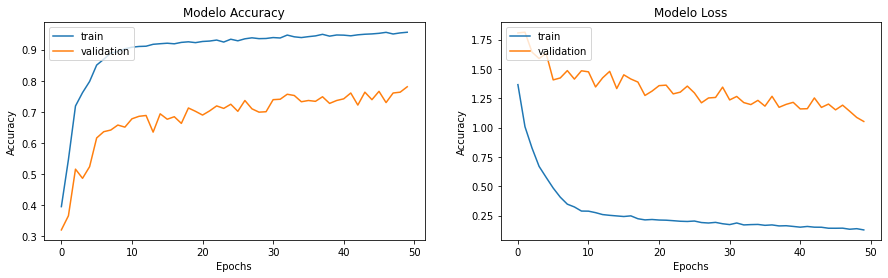


              precision    recall  f1-score   support

   Escaleras       0.66      0.49      0.56       125
     Girando       0.72      0.70      0.71       125
    Sentarse       0.80      0.89      0.84       125
      Trotar       0.85      0.86      0.85       125
     Reposar       0.96      0.99      0.98       125
     Caminar       0.66      0.76      0.70       123

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



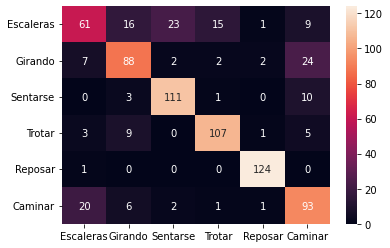

In [ ]:
#@title <font color='blue'>**Se ejecuta el entrenamiento del modelo GRU_2:**</font> Se utilizaron 50 epocas con tamaño de batch 10

## Se realiza el entrenamiento del modelo:
hist_gru2, model_gru2 = begin_train (model_gru2, 'Model_GRU_2', 50, 10)
print()
plot_results (hist_gru2.history)
print()
plot_confusion_matrix (model_gru2, Test, Labels_Val, Targets)

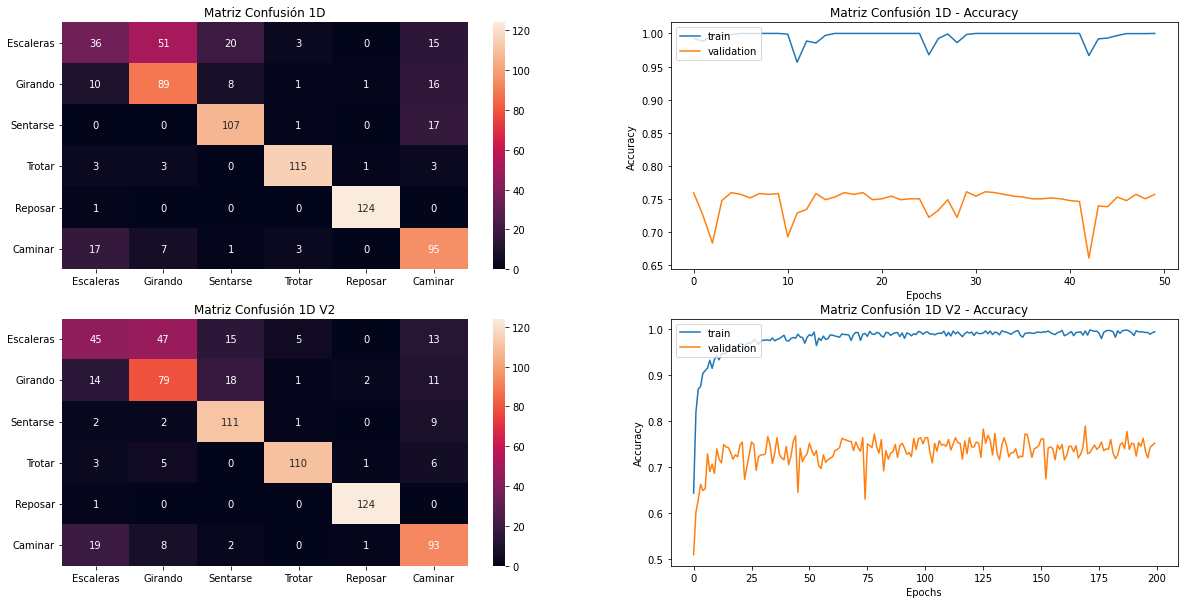

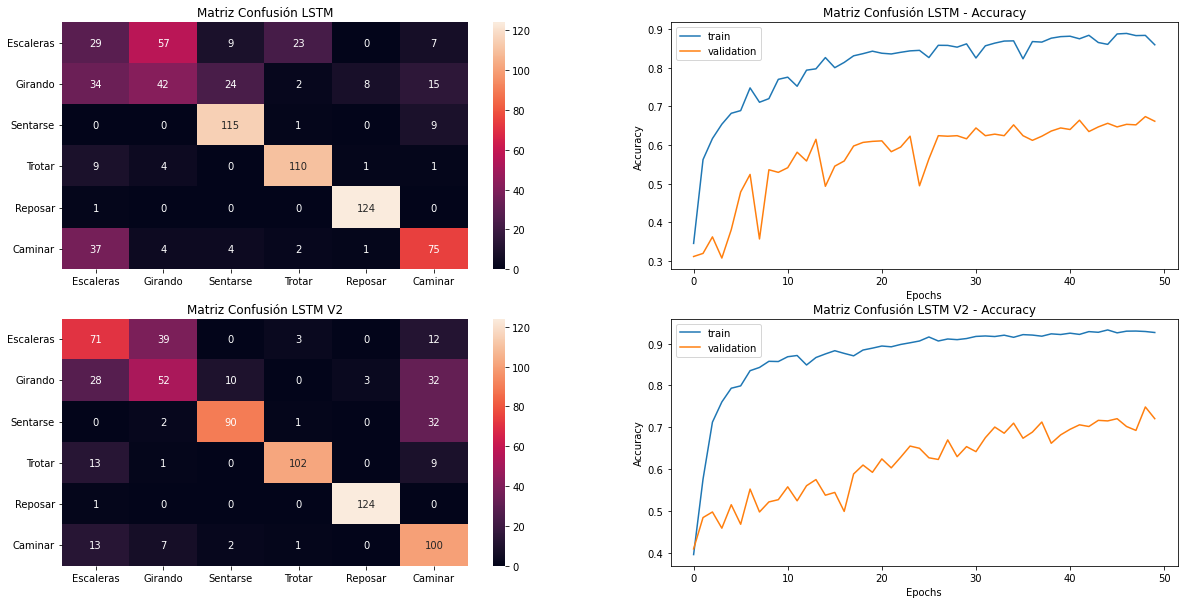

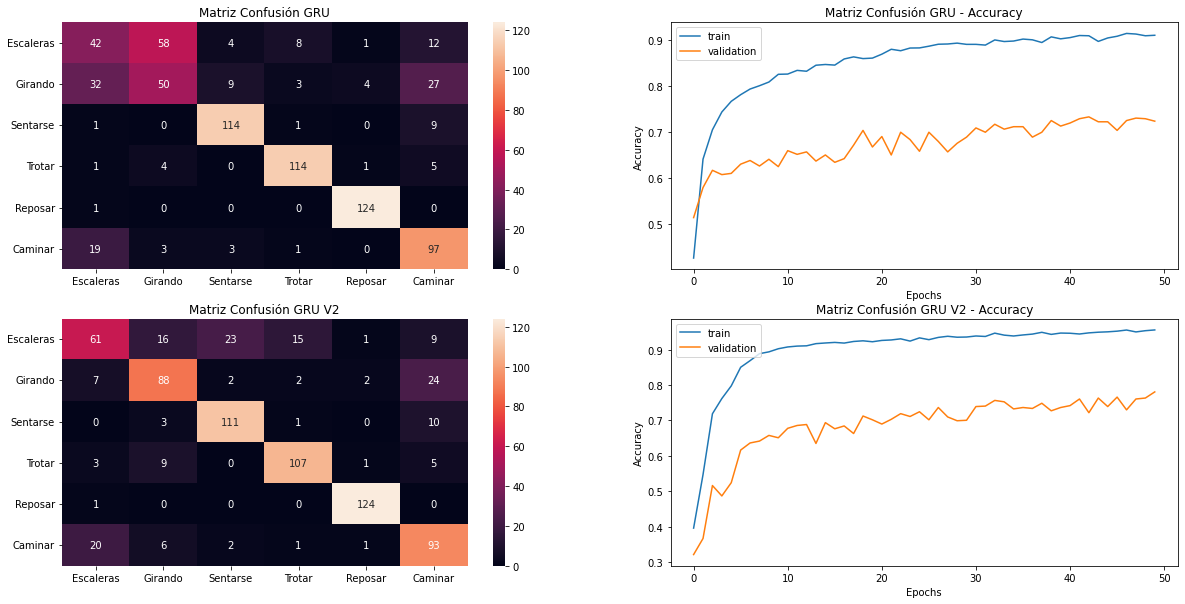

In [ ]:
#@title <font color='blue'>**Conclusiones:**</font> Al validar las distintas arquitecturas de modelos entrenados no fue posible mejorar los resultados en el data set de validación, pero si se puedo encontrar buenos resultados en el dataset de entrenamiento. Concluimos que el modelo que presento un mejor equilibrio de resultados es el GRU V2 entre el data set de entrenamiento y validación. Adicionalmente, es bueno resultar que este modelo no presenta dropout y es el que tiene menos parámetros en su estructura. 

model1d_ld,History1D = load_data(Directory_Gen, 'Model_1D')
model1d2_ld,History1D2 = load_data(Directory_Gen, 'Model_1D_2')
modelLSTM_ld,HistoryLSTM = load_data(Directory_Gen, 'Model_LSTM')
modelLSTM2_ld,HistoryLSTM2 = load_data(Directory_Gen, 'Model_LSTM_2')
modelGRU_ld,HistoryGRU = load_data(Directory_Gen, 'Model_GRU')
modelGRU2_ld,HistoryGRU2 = load_data(Directory_Gen, 'Model_GRU_2')


plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('Matriz Confusión 1D')
plot_confusion_matrix (model1d_ld, Test, Labels_Val, Targets, 0)  
plt.subplot(2,2,2)
plt.title('Matriz Confusión 1D - Accuracy')
plt.plot(History1D['accuracy'])
plt.plot(History1D['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'], loc='upper left')

plt.subplot(2,2,3)
plt.title('Matriz Confusión 1D V2')
plot_confusion_matrix (model1d2_ld, Test, Labels_Val, Targets, 0)  
plt.subplot(2,2,4)
plt.title('Matriz Confusión 1D V2 - Accuracy')
plt.plot(History1D2['accuracy'])
plt.plot(History1D2['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('Matriz Confusión LSTM')
plot_confusion_matrix (modelLSTM_ld, Test, Labels_Val, Targets, 0)  
plt.subplot(2,2,2)
plt.title('Matriz Confusión LSTM - Accuracy')
plt.plot(HistoryLSTM['accuracy'])
plt.plot(HistoryLSTM['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'], loc='upper left')

plt.subplot(2,2,3)
plt.title('Matriz Confusión LSTM V2')
plot_confusion_matrix (modelLSTM2_ld, Test, Labels_Val, Targets, 0)  
plt.subplot(2,2,4)
plt.title('Matriz Confusión LSTM V2 - Accuracy')
plt.plot(HistoryLSTM2['accuracy'])
plt.plot(HistoryLSTM2['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'], loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('Matriz Confusión GRU')
plot_confusion_matrix (modelGRU_ld, Test, Labels_Val, Targets, 0)  
plt.subplot(2,2,2)
plt.title('Matriz Confusión GRU - Accuracy')
plt.plot(HistoryGRU['accuracy'])
plt.plot(HistoryGRU['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'], loc='upper left')

plt.subplot(2,2,3)
plt.title('Matriz Confusión GRU V2')
plot_confusion_matrix (modelGRU2_ld, Test, Labels_Val, Targets, 0)  
plt.subplot(2,2,4)
plt.title('Matriz Confusión GRU V2 - Accuracy')
plt.plot(HistoryGRU2['accuracy'])
plt.plot(HistoryGRU2['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'], loc='upper left')
plt.show()

#**Resultados en Edge Impulse**

Se toman los datos y se especifican los valores de Train y Test.

* **Dataset**

  ![img](https://drive.google.com/uc?id=1zns5EPIrnR36eM-bFlWyP9wp9ASHqgHc)

* **Train**

  ![img](https://drive.google.com/uc?id=1U_zfDyYq5JqYgB-e5idfQ89eMen37oIf)

* **Test**

  ![img](https://drive.google.com/uc?id=1CwwkwBkdoneqXz1pBPF7fn93WDcBw1KD)

* **Createimpulse**

  ![img](https://drive.google.com/uc?id=1VaqqJWa7fI0KnFRdFDaB0yw9yN1uISM-)

* **Spectral**

  ![img](https://drive.google.com/uc?id=1GbkjReMLsROtgTlNACKN1q6Rpdfizxqx)

* **Features**

  ![img](https://drive.google.com/uc?id=1zTytHTHYfZ7ZKSz-rLq37xre1FC6XPej)

Se realiza el entrenamiento y se muestra los resultados con la arquitectura por defecto del aplicativo Edge Impulse. 

* **Arquitectura**

  ![img](https://drive.google.com/uc?id=1FG1GPqEnIX861nJ7Q-FsnLW9oL1W-2jl)

* **Matriz de Confusión**

  ![img](https://drive.google.com/uc?id=1R_RvRyIPHk6Zy6OAzBVI48f4Z9bNMWxx)

* **Features después de Entrenamiento**

  ![img](https://drive.google.com/uc?id=1w5_Xdfgy8NJLbU7fyz4oex4roIxqSC8g)

Se realiza prueba desde el celular en modo clasificación, donde se muestran los siguientes resultados:

* **Modo Clasificación**

  ![img](https://drive.google.com/uc?id=1pF9QnNaCFM1nrWagk-XXvrdcCp3sRFrU)

* **Reposar**

  ![img](https://drive.google.com/uc?id=1zcmL9gVI_XsXnuIh8WPC3ZkmWfskYFdk)

* **Reposar y Sentarse**

  ![img](https://drive.google.com/uc?id=1OibLTTQHKw3ulqeSK9sNZoTaXT-8fqD5)

* **Caminar y Trotar**

  ![img](https://drive.google.com/uc?id=1mX9P2ykymGAW5Q36SFy917biT5eW_rg2)

* **Trotar y Girar**

  ![img](https://drive.google.com/uc?id=1CrehFWZn5hV-bXssgyt0xBFX_rfAdJ6D) 

**Conclusión:** De acuerdo a los datos obtenidos para el dataset, muestra unos excelentes resultados con el modelo entrenado en el aplicativo Edge Impulse. Cabe decir, que se tuvieron errores para desplegar los modelos trabajados en Colab, ya que el aplicativo no permitio ajustarlo de igual forma.

#**Código QR**

Prueba desde Celular y colocar en **MODO CLASIFICADOR**

* **QR**

  ![img](https://drive.google.com/uc?id=1IinnyG5imdL6BUo6XXQcqusZM7LVtuup)

#**Referencias**
  * https://campus.uaovirtual.edu.co/pluginfile.php/422365/mod_resource/content/1/Presentacion_3_DS_DL_2021.pdf

  * https://campus.uaovirtual.edu.co/mod/resource/view.php?id=139777

  * https://campus.uaovirtual.edu.co/mod/resource/view.php?id=175213

  * https://studio.edgeimpulse.com/login
